In [1]:
#Importing all required library
import nltk
import re
import string
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import word_tokenize, sent_tokenize
from wordcloud import WordCloud, STOPWORDS

In [2]:
#Downloading nltk StopWords and Wordnet 
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Hassan\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

# Dataset1
1. Importing 1st dataset
2. EDA on 1st dataset
3. Data pre-processing

In [3]:
Dataset1 = pd.read_csv(r"Data_set\news.csv")

In [4]:
Dataset1.head()

Unnamed: 0                                              title  \
0        8476                       You Can Smell Hillary’s Fear   
1       10294  Watch The Exact Moment Paul Ryan Committed Pol...   
2        3608        Kerry to go to Paris in gesture of sympathy   
3       10142  Bernie supporters on Twitter erupt in anger ag...   
4         875   The Battle of New York: Why This Primary Matters   

                                                text label  
0  Daniel Greenfield, a Shillman Journalism Fello...  FAKE  
1  Google Pinterest Digg Linkedin Reddit Stumbleu...  FAKE  
2  U.S. Secretary of State John F. Kerry said Mon...  REAL  
3  — Kaydee King (@KaydeeKing) November 9, 2016 T...  FAKE  
4  It's primary day in New York and front-runners...  REAL

In [5]:
Dataset1.tail()

Unnamed: 0                                              title  \
6330        4490  State Department says it can't find emails fro...   
6331        8062  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...   
6332        8622  Anti-Trump Protesters Are Tools of the Oligarc...   
6333        4021  In Ethiopia, Obama seeks progress on peace, se...   
6334        4330  Jeb Bush Is Suddenly Attacking Trump. Here's W...   

                                                   text label  
6330  The State Department told the Republican Natio...  REAL  
6331  The ‘P’ in PBS Should Stand for ‘Plutocratic’ ...  FAKE  
6332   Anti-Trump Protesters Are Tools of the Oligar...  FAKE  
6333  ADDIS ABABA, Ethiopia —President Obama convene...  REAL  
6334  Jeb Bush Is Suddenly Attacking Trump. Here's W...  REAL

In [6]:
Dataset1.nunique()

Unnamed: 0    6335
title         6256
text          6060
label            2
dtype: int64

In [7]:
Dataset1["Article"] = Dataset1["title"] + Dataset1["text"]
Dataset1.sample(frac = 1) #Shuffle 100%

Dataset1.label[Dataset1.label == 'REAL'] = 1
Dataset1.label[Dataset1.label == 'FAKE'] = 0

Dataset1 = Dataset1.loc[:,['Article','label']]
Dataset1 = Dataset1.dropna()

C:\Users\Hassan\AppData\Local\Temp/ipykernel_18792/3616711757.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'REAL'] = 1
C:\Users\Hassan\AppData\Local\Temp/ipykernel_18792/3616711757.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Dataset1.label[Dataset1.label == 'FAKE'] = 0


In this step we will clean the data that will be used for training. The cleaning will involve these steps-
1.Removing all the extra information like brackets, any kind of puctuations - commas, apostrophes, quotes, question marks, and more.
2.Remove all the numeric text, urls

In [8]:
def wordpre(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) # remove special chars
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    
    return text

In [9]:
##  Applying the wordpre method to the dataset
Dataset1['Article']=Dataset1['Article'].apply(wordpre)

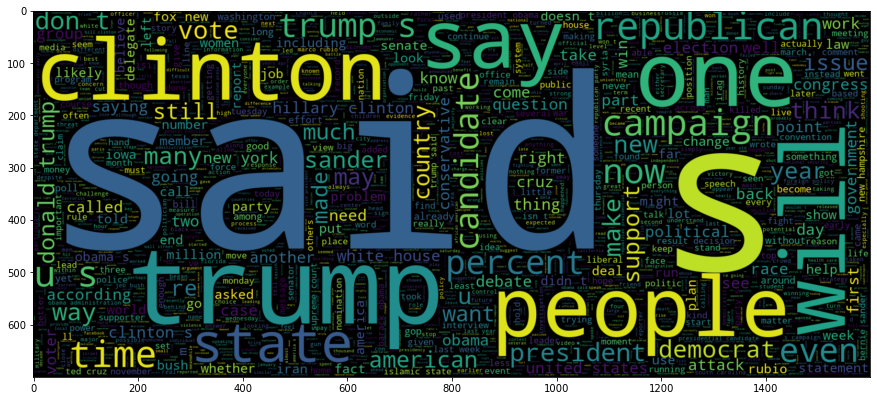

In [10]:
#word used in Real news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

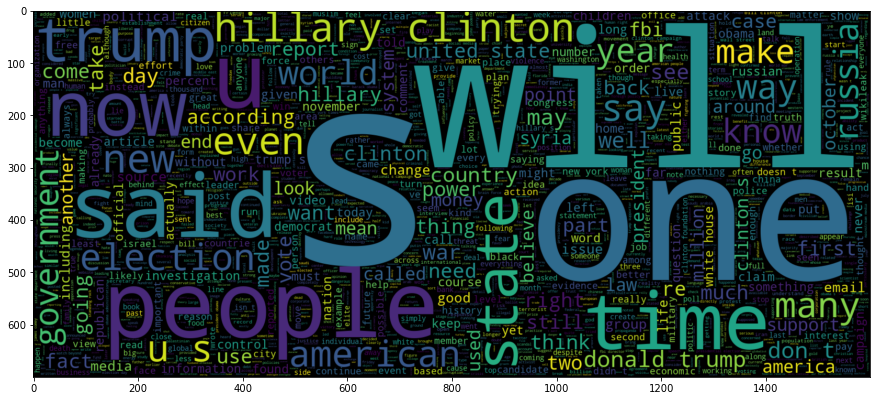

In [11]:
#word used in Fake news 
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset1[Dataset1.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset2

In [12]:
Dataset2_true = pd.read_csv(r"Data_set\True.csv")
Dataset2_fake = pd.read_csv(r"Data_set\Fake.csv")

In [13]:
Dataset2_true.nunique()

title      20826
text       21192
subject        2
date         716
dtype: int64

In [14]:
Dataset2_fake.nunique()

title      17903
text       17455
subject        6
date        1681
dtype: int64

In [15]:
#Counting by Subjects in Real news
for key,count in Dataset2_true.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Dataset2_true.shape[0]}")

politicsNews:	11272
worldnews:	10145
Total Records:	21417


In [16]:
#Counting by Subjects in Fake news
for key,count in Dataset2_fake.subject.value_counts().iteritems():
    print(f"{key}:\t{count}")
    
#Getting Total Rows
print(f"Total Records:\t{Dataset2_fake.shape[0]}")

News:	9050
politics:	6841
left-news:	4459
Government News:	1570
US_News:	783
Middle-east:	778
Total Records:	23481


C:\Users\Hassan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


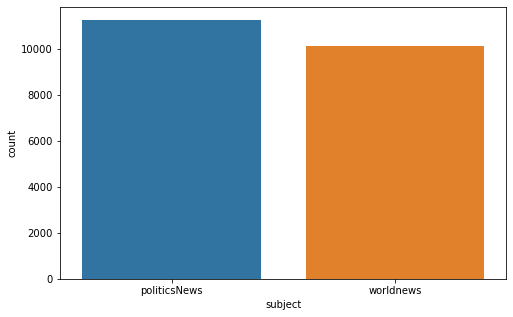

In [17]:
#ploting the Subjects in Real news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_true)
plt.show()

C:\Users\Hassan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


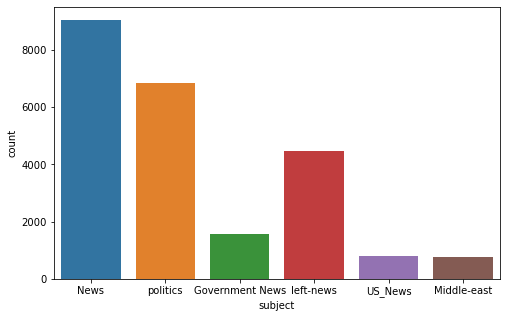

In [18]:
#ploting the Subjects in Fake news
plt.figure(figsize=(8,5))
sns.countplot("subject", data=Dataset2_fake)
plt.show()

In [19]:
Dataset2_true['label']= 1
Dataset2_fake['label']= 0
Dataset2 = pd.concat([Dataset2_true, Dataset2_fake])
Dataset2["Article"] = Dataset2["title"] + Dataset2["text"]
Dataset2.sample(frac = 1) #Shuffle 100%
Dataset2 = Dataset2.loc[:,['Article','label']]

In [20]:
Dataset2

Article  label
0      As U.S. budget fight looms, Republicans flip t...      1
1      U.S. military to accept transgender recruits o...      1
2      Senior U.S. Republican senator: 'Let Mr. Muell...      1
3      FBI Russia probe helped by Australian diplomat...      1
4      Trump wants Postal Service to charge 'much mor...      1
...                                                  ...    ...
23476  McPain: John McCain Furious That Iran Treated ...      0
23477  JUSTICE? Yahoo Settles E-mail Privacy Class-ac...      0
23478  Sunnistan: US and Allied ‘Safe Zone’ Plan to T...      0
23479  How to Blow $700 Million: Al Jazeera America F...      0
23480  10 U.S. Navy Sailors Held by Iranian Military ...      0

[44898 rows x 2 columns]

In [21]:
##  Applying the wordpre method to the dataset
Dataset2['Article']=Dataset2['Article'].apply(wordpre)

In [22]:
Dataset2

Article  label
0      as u s  budget fight looms  republicans flip t...      1
1      u s  military to accept transgender recruits o...      1
2      senior u s  republican senator   let mr  muell...      1
3      fbi russia probe helped by australian diplomat...      1
4      trump wants postal service to charge  much mor...      1
...                                                  ...    ...
23476  mcpain  john mccain furious that iran treated ...      0
23477  justice  yahoo settles e mail privacy class ac...      0
23478  sunnistan  us and allied  safe zone  plan to t...      0
23479  how to blow   million  al jazeera america fina...      0
23480   u s  navy sailors held by iranian military   ...      0

[44898 rows x 2 columns]

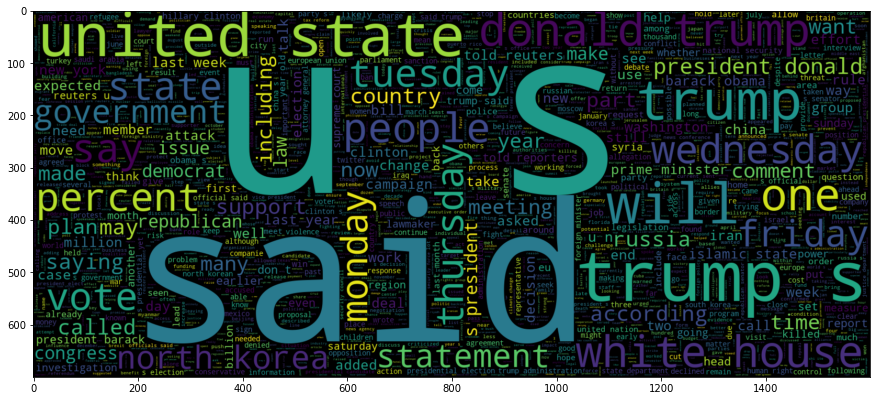

In [23]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

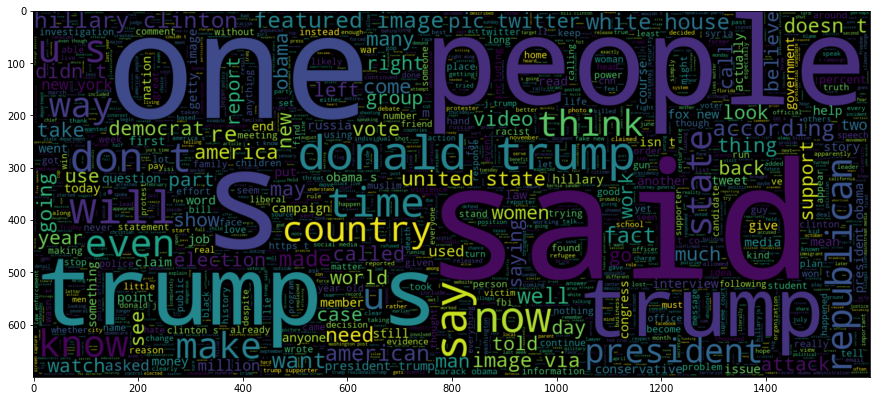

In [24]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset2[Dataset2.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 3

In [25]:
Dataset3_real = pd.read_csv(r"Data_set\politifact_real.csv")
Dataset3_fake = pd.read_csv(r"Data_set\politifact_fake.csv")

In [26]:
Dataset3_real['label']= 1
Dataset3_fake['label']= 0
Dataset3 = pd.concat([Dataset3_real, Dataset3_fake])
Dataset3["Article"] = Dataset3["title"]
Dataset3.sample(frac = 1) #Shuffle 100%
Dataset3 = Dataset3.loc[:,['Article','label']]

In [27]:
Dataset3

Article  label
0          National Federation of Independent Business      1
1                          comments in Fayetteville NC      1
2    Romney makes pitch, hoping to close deal : Ele...      1
3    Democratic Leaders Say House Democrats Are Uni...      1
4      Budget of the United States Government, FY 2008      1
..                                                 ...    ...
427        Who is affected by the government shutdown?      0
428  Lindsey Graham Threatens To Convert To Democra...      0
429  ELECTORAL COLLEGE ELECTOR COMMITS SUICIDE TO A...      0
430  Sarah Palin Calls To Boycott Mall Of America B...      0
431                                  Account Suspended      0

[1056 rows x 2 columns]

In [28]:
##  Applying the wordpre method to the dataset
Dataset3['Article']=Dataset3['Article'].apply(wordpre)

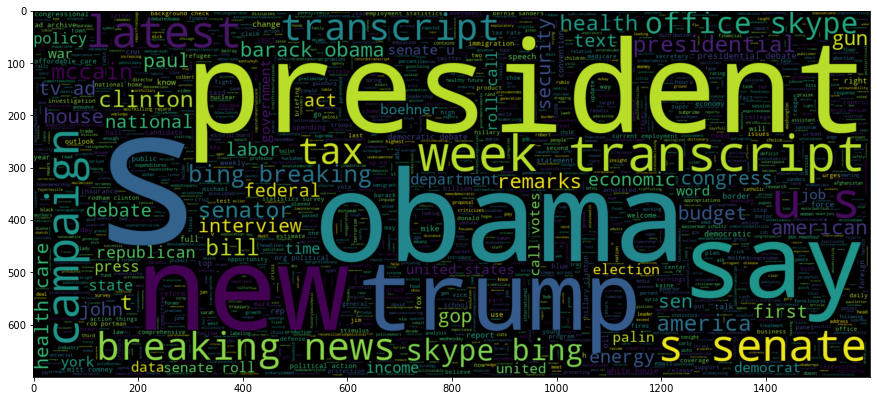

In [29]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

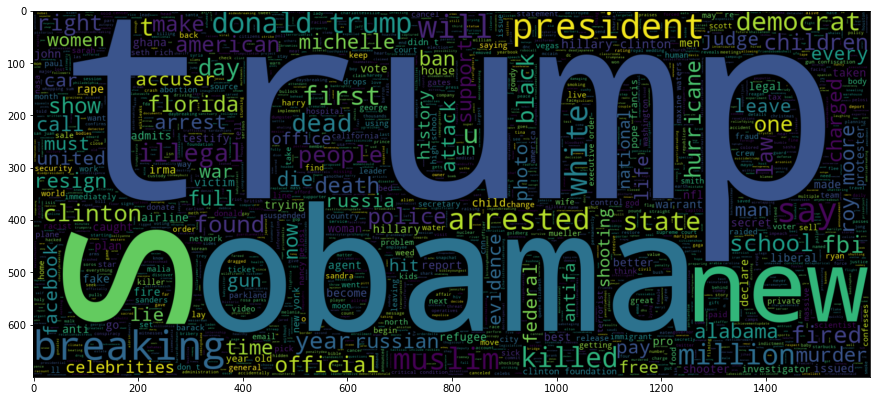

In [30]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset3[Dataset3.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 4

In [31]:
Dataset4 = pd.read_csv(r"Data_set\train.csv")

In [32]:
Dataset4.head()

id                                              title              author  \
0   0  House Dem Aide: We Didn’t Even See Comey’s Let...       Darrell Lucus   
1   1  FLYNN: Hillary Clinton, Big Woman on Campus - ...     Daniel J. Flynn   
2   2                  Why the Truth Might Get You Fired  Consortiumnews.com   
3   3  15 Civilians Killed In Single US Airstrike Hav...     Jessica Purkiss   
4   4  Iranian woman jailed for fictional unpublished...      Howard Portnoy   

                                                text  label  
0  House Dem Aide: We Didn’t Even See Comey’s Let...      1  
1  Ever get the feeling your life circles the rou...      0  
2  Why the Truth Might Get You Fired October 29, ...      1  
3  Videos 15 Civilians Killed In Single US Airstr...      1  
4  Print \nAn Iranian woman has been sentenced to...      1

In [33]:
Dataset4["Article"] = Dataset4["title"] + Dataset4["text"]
Dataset4["label"] = Dataset4["label"]
Dataset4.sample(frac = 1) #Shuffle 100%

Dataset4 = Dataset4.loc[:,['Article','label']]
Dataset4 = Dataset4.dropna()

In [34]:
##  Applying the wordpre method to the dataset
Dataset4['Article']=Dataset4['Article'].apply(wordpre)

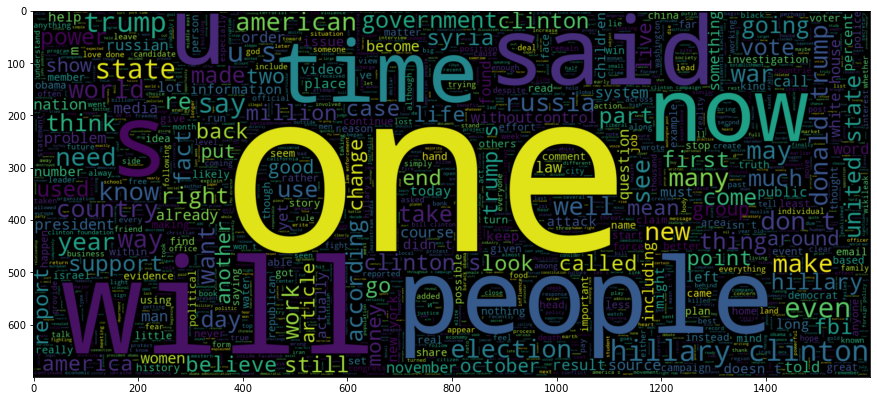

In [35]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

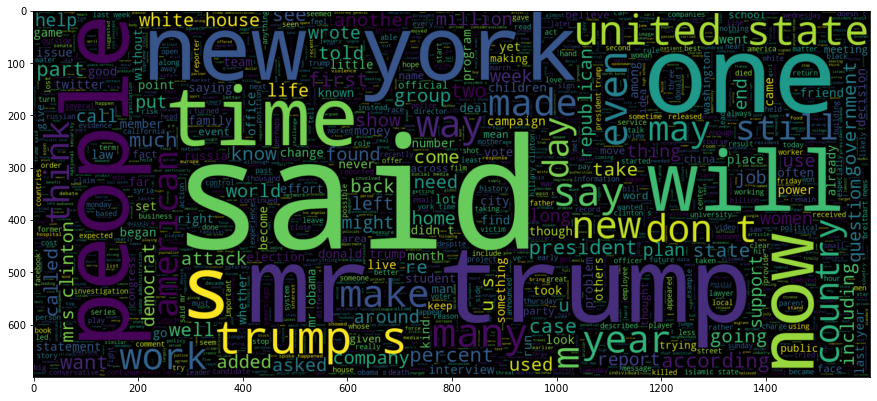

In [36]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset4[Dataset4.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

# Dataset 5

In [37]:
Dataset5 = pd.read_csv("Data_set\data.csv")

In [38]:
Dataset5

URLs  \
0     http://www.bbc.com/news/world-us-canada-414191...   
1     https://www.reuters.com/article/us-filmfestiva...   
2     https://www.nytimes.com/2017/10/09/us/politics...   
3     https://www.reuters.com/article/us-mexico-oil-...   
4     http://www.cnn.com/videos/cnnmoney/2017/10/08/...   
...                                                 ...   
4004  http://beforeitsnews.com/sports/2017/09/trends...   
4005  http://beforeitsnews.com/u-s-politics/2017/10/...   
4006  https://www.activistpost.com/2017/09/ron-paul-...   
4007  https://www.reuters.com/article/us-china-pharm...   
4008  http://beforeitsnews.com/u-s-politics/2017/10/...   

                                               Headline  \
0            Four ways Bob Corker skewered Donald Trump   
1     Linklater's war veteran comedy speaks to moder...   
2     Trump’s Fight With Corker Jeopardizes His Legi...   
3     Egypt's Cheiron wins tie-up with Pemex for Mex...   
4           Jason Aldean opens 'SNL' with Vegas tribute   
...                                                 ...   
4004                                    Trends to Watch   
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...   
4006        Ron Paul on Trump, Anarchism & the AltRight   
4007  China to accept overseas trial data in bid to ...   
4008  Vice President Mike Pence Leaves NFL Game Beca...   

                                                   Body  Label  
0     Image copyright Getty Images\nOn Sunday mornin...      1  
1     LONDON (Reuters) - “Last Flag Flying”, a comed...      1  
2     The feud broke into public view last week when...      1  
3     MEXICO CITY (Reuters) - Egypt’s Cheiron Holdin...      1  
4     Country singer Jason Aldean, who was performin...      1  
...                                                 ...    ...  
4004  Trends to Watch\n% of readers think this story...      0  
4005  Trump Jr. Is Soon To Give A 30-Minute Speech F...      0  
4006                                                NaN      0  
4007  SHANGHAI (Reuters) - China said it plans to ac...      1  
4008  Vice President Mike Pence Leaves NFL Game Beca...      0  

[4009 rows x 4 columns]

In [39]:
Dataset5["Article"] = Dataset5["Headline"] + Dataset5["Body"]
Dataset5["label"] = Dataset5["Label"]
Dataset5.sample(frac = 1) #Shuffle 100%
Dataset5 = Dataset5.loc[:,['Article','label']]
Dataset5 = Dataset5.dropna()

In [40]:
##  Applying the wordpre method to the dataset
Dataset5['Article']=Dataset5['Article'].apply(wordpre)

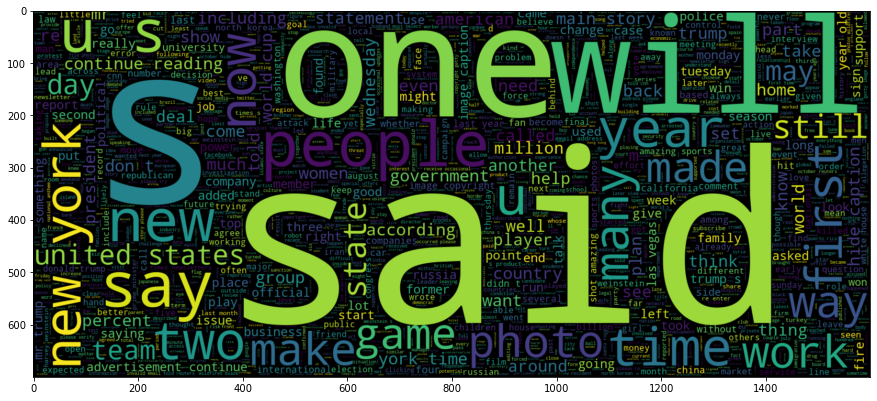

In [41]:
#word used in Real news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 1].Article))
plt.imshow(wc, interpolation="bilinear")

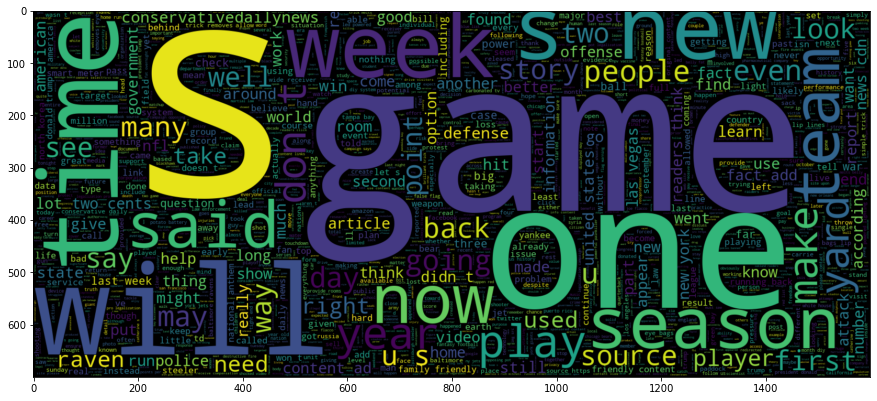

In [42]:
#word used in Fake news
plt.figure(figsize=(15,15))
wc=WordCloud(max_words=2000, width=1600, height=700, stopwords=STOPWORDS).generate("".join(Dataset5[Dataset5.label== 0].Article))
plt.imshow(wc, interpolation="bilinear")

In [43]:
#combining all the datset into one
frames = [Dataset1, Dataset2, Dataset3, Dataset4, Dataset5]
Dataset = pd.concat(frames)

In [44]:
Dataset.shape

(76480, 2)

In [45]:
x_train, x_test, y_train, y_test = train_test_split(Dataset['Article'], Dataset['label'], test_size=0.2, random_state=2020)

In [46]:
x_train.shape

(61184,)

In [47]:
x_test.shape

(15296,)

In [48]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [49]:
#LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', LogisticRegression())])

Logisticmodel = pipe.fit(x_train, y_train)
prediction = Logisticmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Logisticmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 87.04%


In [50]:
#####DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', DecisionTreeClassifier(criterion= 'entropy',
                                           max_depth = 10, 
                                           splitter='best', 
                                           random_state=2020))])
DecisionTreemodel = pipe.fit(x_train, y_train)
prediction = DecisionTreemodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
DecisionTreemodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.07%


In [51]:
#####RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', RandomForestClassifier())])

RandomForestmodel = pipe.fit(x_train, y_train) 
prediction = RandomForestmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
RandomForestmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 82.57%


In [52]:
#Stochastic Gradient Descent
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', SGDClassifier())])
SGDmodel = pipe.fit(x_train, y_train)
prediction = SGDmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
SDGmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 86.25%


In [53]:
#GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', GradientBoostingClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=55))])

GBCmodel = pipe.fit(x_train, y_train)
prediction = GBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
GBCmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 80.71%


In [56]:
#########XGBClassifier
from xgboost import XGBClassifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', XGBClassifier(loss = 'deviance',
                                                   learning_rate = 0.01,
                                                   n_estimators = 10,
                                                   max_depth = 5,
                                                   random_state=2020))])

xgboostmodel = pipe.fit(x_train, y_train)
prediction = xgboostmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
xgboostmodel_accuracy = round(accuracy_score(y_test, prediction)*100,2)

C:\Users\Hassan\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[12:58:14] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:576: 
Parameters: { "loss" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[12:58:17] WARNING: D:\bld\xgboost-split_1645118015404\work\src\learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuracy: 80.75%


In [57]:
#######Multinomial Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', MultinomialNB())])

MNBCmodel = pipe.fit(x_train, y_train)
prediction = MNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Multinomial_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 78.79%


In [58]:
#############Bernoulli Naive Bayes Classifier
pipe = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('model', BernoulliNB())])

BNBCmodel = pipe.fit(x_train, y_train)
prediction = BNBCmodel.predict(x_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
Bernoulli_Naive_Bayes_accuracy = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 76.08%


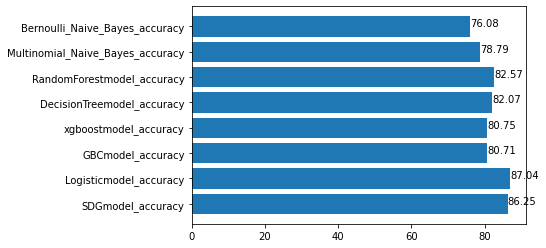

In [59]:
x = ["SDGmodel_accuracy", "Logisticmodel_accuracy", "GBCmodel_accuracy", "xgboostmodel_accuracy" , 
     "DecisionTreemodel_accuracy","RandomForestmodel_accuracy","Multinomial_Naive_Bayes_accuracy",
     "Bernoulli_Naive_Bayes_accuracy"]
y =  [SDGmodel_accuracy,Logisticmodel_accuracy,GBCmodel_accuracy,xgboostmodel_accuracy,
      DecisionTreemodel_accuracy,RandomForestmodel_accuracy,Multinomial_Naive_Bayes_accuracy,
      Bernoulli_Naive_Bayes_accuracy]
plt.barh(x, y)

for index, value in enumerate(y):
    plt.text(value, index, str(value))

In [60]:
import joblib  
# Save the model as a pickle in a file 
joblib.dump(Logisticmodel, 'model.pkl')  

['model.pkl']